In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [2]:
#  Load data
df = pd.read_csv('../data/skytrax_reviews.csv', sep=';', index_col=0)

<Axes: >

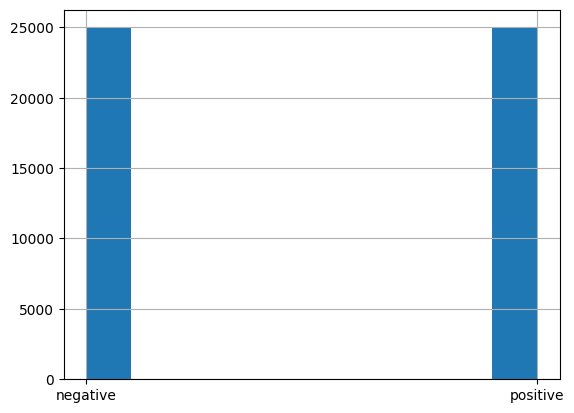

In [4]:
df['Sentiment'].hist()

In [3]:
# Binarize

df['binary_label'] = df['Sentiment'].map({'positive': 1, 'negative':0})

In [5]:
# Target labels
Y = df['binary_label'].to_numpy()

# Split data
df_train, df_test, Ytrain, Ytest = train_test_split(df['review_text'].values.astype('U'), Y, test_size=0.33)

In [7]:
# Feature Engineering

featurizer = TfidfVectorizer(decode_error='ignore')
X_train = featurizer.fit_transform(df_train)
X_test = featurizer.transform(df_test)

In [8]:
# Creating the model
model = LogisticRegression()
model.fit(X_train, Ytrain)
print("Train Accuracy:", model.score(X_train, Ytrain))
print("Test Accuracy:", model.score(X_test, Ytest))

Train Accuracy: 0.9598507462686567
Test Accuracy: 0.9481212121212121


In [11]:
Ptrain = model.predict(X_train)
Ptest = model.predict(X_test)
print("Train F1:", f1_score(Ytrain, Ptrain))
print("Test F1:", f1_score(Ytest, Ptest))

Train F1: 0.9596132480557307
Test F1: 0.9483964311550518


In [12]:
# AUC
Prob_train = model.predict_proba(X_train)[:,1]
Prob_test = model.predict_proba(X_test)[:,1]
print("train AUC", roc_auc_score(Ytrain, Prob_train))
print("test AUC", roc_auc_score(Ytest, Prob_test))

train AUC 0.9925632885974199
test AUC 0.9879943841820864


In [13]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[16176,   625],
       [  720, 15979]], dtype=int64)

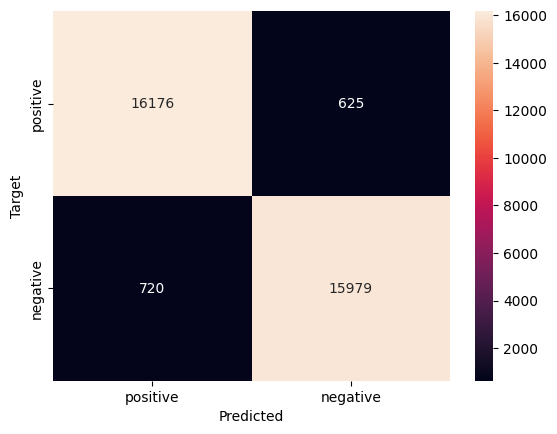

In [14]:
# Plotting the confusion matrix
def plot_cm(cm):
  classes = ['positive', 'negative']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)